In [8]:
# 1. Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# 2. Baca dataset
df = pd.read_csv('bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [10]:
# Lihat info dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [12]:
# Cek nilai unik dari kolom target
print(df['Purchased Bike'].value_counts())

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


In [13]:
# Cek missing value
print(df.isnull().sum())

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [17]:
# Menangani Missing Value
# isi nilai kosong dengan modus (untuk kategorikal)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)
df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)

# isi nilai kosong dengan median (untuk numerik)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Cars'].fillna(df['Cars'].median(), inplace=True)

<ipython-input-17-75b271a40967>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)
<ipython-input-17-75b271a40967>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [18]:
# Cek missing value
print(df.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [20]:
# Label encoding kolom kategorikal
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Purchase dBike'] = le.fit_transform(df['Purchased Bike'])  # Yes=1, No=0

In [22]:
# Pilih fitur dan target
X = df[['Age', 'Gender', 'Income']]  # Bisa tambah fitur lain
y = df['Purchased Bike']


In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Buat model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Prediksi
y_pred = model.predict(X_test)

In [26]:
# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61 45]
 [52 42]]
              precision    recall  f1-score   support

          No       0.54      0.58      0.56       106
         Yes       0.48      0.45      0.46        94

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



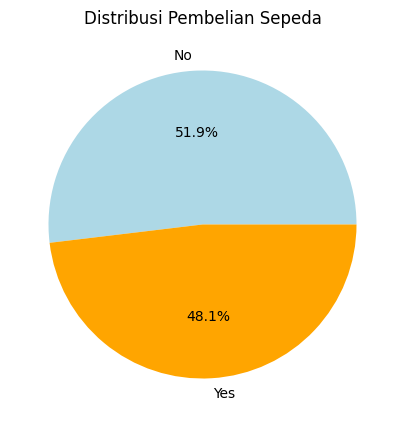

In [28]:
# Pie chart pembelian
plt.figure(figsize=(5,5))
df['Purchased Bike'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], colors=['lightblue','orange'])
plt.title('Distribusi Pembelian Sepeda')
plt.ylabel('')
plt.show()